In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 
import matplotlib


In [5]:
#loading the dataset into a data frame in pandas
df = pd.read_csv("../data/data_set.csv")

In [6]:
#displaying a sample of the dataset
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
#number of rows and columns inside the dataset
df.shape

(13320, 9)

In [8]:
#Get count of each unique area_type
area_type_counts = df['area_type'].value_counts()
print(area_type_counts)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


In [9]:
#from observing the dataset , i have decided to drop columns like area_type,availability,society,balcony as i felt they are not needed
df1=df.drop(['area_type','society','availability','balcony'],axis='columns')

In [10]:
#new dataframe with more important features
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
#now we can start cleaning the data , first lets look for the NA values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
#since the number of NA values are very small compared to the number of entries in our dataset , we will drop the na rows
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.shape

(13246, 5)

In [14]:
df2['size'].unique()
#as you can see the same information is being represented in diffrent ways so lets make it consistent

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
#since models only understand numbers we will just extract the number and ignore words like 'bhk' or 'bedroom', but we will add a new column
df2['BHK'] = df2['size'].apply(lambda x: int(x.split()[0]))

C:\Users\krish\AppData\Local\Temp\ipykernel_3488\2818120815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x: int(x.split()[0]))


In [16]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df2['BHK'].unique()
#these are the diffrent types of unique BHK numbers , however we notice some really large BHK numbers , 
# so lets apply some domain knowledge related to banglore houses
#from research , https://www.99acres.com/8-bhk-flats-in-bangalore-5-crores-to-10-crores-ffid , i have taken 8 as the upper limit
#but before i make any desssion lets see the value counts of the various bhks
df2['BHK'].value_counts()


BHK
2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [18]:
#as we can see, there are very few above the value of 8 , so we can treat them as outliers as they may cause inaccruies in the model , so lets drop them
df3 = df2[df2['BHK'] <= 8]

In [19]:
#now its much better
df3['BHK'].value_counts()

BHK
2    5527
3    4832
4    1395
1     649
5     353
6     221
7     100
8      89
Name: count, dtype: int64

In [20]:
#now lets analze the total_sqft feature
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2057,), dtype=object)

In [21]:
df3['total_sqft'].value_counts()
# we can see that some of the values are in a range , and not a single number , so we can either take a avg of the two numbers or just drop them

total_sqft
1200           821
1100           221
1500           203
2400           192
600            178
              ... 
1437 - 1629      1
2485             1
2785             1
4689             1
1557             1
Name: count, Length: 2057, dtype: int64

In [22]:
df4=df3

In [23]:

#this function is to check which values are of float type , and which values are inconsistent
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df4[~df4['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,59.935,2


In [25]:
#now we can these that there are these various types of inconsistent data types , we need to convert them all into float
df4[~df4['total_sqft'].apply(is_float)]['total_sqft'].value_counts()

total_sqft
2830 - 2882        5
3630 - 3800        3
1804 - 2273        2
1115 - 1130        2
142.61Sq. Meter    2
                  ..
300Sq. Yards       1
1437 - 1629        1
850 - 1060         1
1200 - 1470        1
1133 - 1384        1
Name: count, Length: 171, dtype: int64

In [26]:
patterns = df4['total_sqft'][df4['total_sqft'].astype(str).str.contains(r'\d+\s*[A-Za-z]')].unique()
print(patterns)

['34.46Sq. Meter' '1000Sq. Meter' '1100Sq. Yards' '5.31Acres' '30Acres'
 '1500Sq. Meter' '142.61Sq. Meter' '1574Sq. Yards' '361.33Sq. Yards'
 '117Sq. Yards' '3040Sq. Meter' '500Sq. Yards' '167Sq. Meter'
 '315Sq. Yards' '3Cents' '188.89Sq. Yards' '204Sq. Meter' '45Sq. Yards'
 '133.3Sq. Yards' '78.03Sq. Meter' '122Sq. Yards' '84.53Sq. Meter'
 '2.09Acres' '24Guntha' '697Sq. Meter' '1500Cents' '132Sq. Yards' '2Acres'
 '1100Sq. Meter' '15Acres' '1.26Acres' '151.11Sq. Yards' '1Grounds'
 '2940Sq. Yards' '45.06Sq. Meter' '1.25Acres' '86.72Sq. Meter' '38Guntha'
 '6Acres' '120Sq. Yards' '24Sq. Meter' '142.84Sq. Meter' '300Sq. Yards']


In [27]:
df5=df4

In [28]:
def simple_convert_to_sqft(value):
    """
    Simple function to convert to sqft.
    Handles two cases:
    1. Pure numbers/ranges (e.g., "2830 - 2882") - takes average
    2. Units (e.g., "34.46Sq. Meter") - converts to sqft
    """
    import re
    
    # If already a number, return it
    if isinstance(value, (int, float)):
        return value
    
    val_str = str(value).strip()
    
    # Case 1: Check if it's a simple range (only numbers and dash)
    if re.match(r'^[\d\.\s\-]+$', val_str):
        # Extract all numbers and take average
        nums = [float(n) for n in re.findall(r'\d+\.?\d*', val_str)]
        if nums:
            return sum(nums) / len(nums)  # Average for ranges
    
    # Case 2: Has units - extract number and convert
    num_match = re.search(r'(\d+\.?\d*)', val_str)
    if not num_match:
        return None
    
    num = float(num_match.group(1))
    
    # Simple unit conversion
    val_lower = val_str.lower()
    
    if 'meter' in val_lower:          # Sq. Meter
        return num * 10.7639
    elif 'yard' in val_lower:         # Sq. Yards
        return num * 9
    elif 'acre' in val_lower:         # Acres
        return num * 43560
    elif 'cent' in val_lower:         # Cents
        return num * 435.6
    elif 'guntha' in val_lower:       # Guntha
        return num * 1089
    elif 'ground' in val_lower:       # Grounds
        return num * 2400
    else:
        # If no known unit but has letters, return None
        if re.search('[a-zA-Z]', val_str):
            return None
        # Otherwise assume it's already in sqft
        return num


In [29]:
df5['total_sqft'] = df5['total_sqft'].apply(simple_convert_to_sqft)

C:\Users\krish\AppData\Local\Temp\ipykernel_3488\1687341338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['total_sqft'] = df5['total_sqft'].apply(simple_convert_to_sqft)


In [30]:
df5[~df5['total_sqft'].apply(is_float)]['total_sqft'].value_counts()
#okay now witht his we have made all the values as float ensuring datatype consistency

Series([], Name: count, dtype: int64)

In [31]:
df5['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ], shape=(1997,))

In [32]:
df5.head(20)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [33]:
# as in real estate what really matters is price per sqft 
# so lets make a new column

df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

C:\Users\krish\AppData\Local\Temp\ipykernel_3488\2474567054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']


,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
df5['location'].value_counts()
# as we can see not all locations have a lot of plots , 
# some of them only have one
# so we can just assign them as 'others' 
# this will help us reduce demntionality as later we need to
# convert them into dummy variables

location
Whitefield                534
Sarjapur  Road            392
Electronic City           301
Kanakpura Road            266
Thanisandra               233
                         ... 
Halanayakanahalli           1
Allalasandra                1
Ramanagara Channapatna      1
Maheswari Nagar             1
Hsr layout sector3          1
Name: count, Length: 1292, dtype: int64

In [35]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5['location'].value_counts()

C:\Users\krish\AppData\Local\Temp\ipykernel_3488\2588514357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['location'] = df5['location'].apply(lambda x: x.strip())


In [36]:
location_stats
# so we will come up with a threshhold , 
# and the datapoints which have less than that threshold 
# we will assign them as 'other'



location
Whitefield               535
Sarjapur  Road           392
Electronic City          303
Kanakpura Road           266
Thanisandra              236
                        ... 
kadubisnahalli             1
Kanakapura main  Road      1
Zuzuvadi                   1
Chellikere                 1
Wheelers Road              1
Name: count, Length: 1281, dtype: int64

In [37]:
a=[]
for i in location_stats:
    if i<=10:
        a.append(i)
print(len(a))
#we have 1040 data poitns with less than 10 plots
#so we will call these locations as 'others'

1040


In [38]:
df5['location'] = df5['location'].apply(
    lambda x: x if df5['location'].value_counts()[x] > 10 else 'other'
)

C:\Users\krish\AppData\Local\Temp\ipykernel_3488\364295639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['location'] = df5['location'].apply(


In [39]:
df5['location'].value_counts()

location
other                        2845
Whitefield                    535
Sarjapur  Road                392
Electronic City               303
Kanakpura Road                266
                             ... 
2nd Phase Judicial Layout      11
Marsur                         11
Mico Layout                    11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

In [40]:
df6 = df5

In [41]:
df6.head(20)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [42]:
#outlier removal now
#we can use techniques like domain knowledge , z-score , etc for outlier removal
#e.g we can compare the sqft and bhk ratio , as houses with less bhk cannot have more sqft and vice versa
#we ussulay need to ask our manager or expert realted to the sqft and bhk ratio threshold , lets assume its 300

df6[(df6['total_sqft']/df6['BHK'])<300].head()


,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [43]:
#we notice that the first datapoint , 1020.0sqft for 6bhk , 
# thats very unsusual, so these are the outliers
#therefore we will remove these
print(df5.shape)
df6 = df6[~((df6['total_sqft']/df6['BHK'])<300)]
print(df6.shape)


(13166, 7)
(12471, 7)


In [44]:
#now lets analyze the price per sqft feature and look for any outliers
df6['price_per_sqft'].describe()
#we see that the min value is 2.25 which is highly unlikly
#i firt tried z-score but 
# Z-score failed because the data was heavily skewed 
# (not normal distribution), making extreme outliers skew the mean/std calculations.
#then i tried %ile method for outlier removal
#Percentile approach worked better but was arbitrary in cutoff selection without considering data spread.
#finally i tried the IQR method which worked perfeclty
#IQR (Interquartile Range) is best because it's robust to outliers -
# as it uses median/quartiles (unaffected by extremes) to define "normal" range, 
# therefore preserving true data distribution while removing anomalies.

count     12471.000000
mean       6293.586803
std        4144.196636
min           2.257423
25%        4205.978341
50%        5291.005291
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [45]:
Q1 = df6['price_per_sqft'].quantile(0.25)
Q3 = df6['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Use 1.5 * IQR for moderate filtering, 3 * IQR for conservative
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ensure lower bound is reasonable (not negative)
lower_bound = max(lower_bound, df6['price_per_sqft'].quantile(0.01))

df6 = df6[(df6['price_per_sqft'] >= lower_bound) & (df6['price_per_sqft'] <= upper_bound)]
print(df6['price_per_sqft'].describe())

count    11373.000000
mean      5443.516123
std       1740.985968
min       2500.000000
25%       4164.705882
50%       5128.205128
75%       6437.125749
max      10979.228487
Name: price_per_sqft, dtype: float64


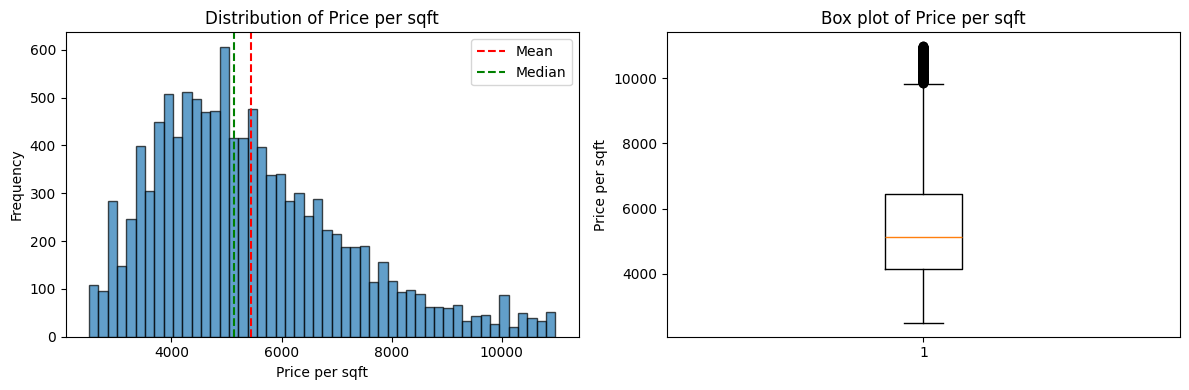

Data shape: (11373, 7)
Price per sqft range: 2500 to 10979
Mean: 5444, Median: 5128
Coefficient of Variation (std/mean): 32.0%


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df6['price_per_sqft'], bins=50, edgecolor='black', alpha=0.7)
plt.axvline(df6['price_per_sqft'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df6['price_per_sqft'].median(), color='green', linestyle='--', label='Median')
plt.xlabel('Price per sqft')
plt.ylabel('Frequency')
plt.title('Distribution of Price per sqft')
plt.legend()

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(df6['price_per_sqft'])
plt.ylabel('Price per sqft')
plt.title('Box plot of Price per sqft')

plt.tight_layout()
plt.show()

# Final check
print(f"Data shape: {df6.shape}")
print(f"Price per sqft range: {df6['price_per_sqft'].min():.0f} to {df6['price_per_sqft'].max():.0f}")
print(f"Mean: {df6['price_per_sqft'].mean():.0f}, Median: {df6['price_per_sqft'].median():.0f}")
print(f"Coefficient of Variation (std/mean): {(df6['price_per_sqft'].std()/df6['price_per_sqft'].mean())*100:.1f}%")

In [47]:
print(df6.shape)
df6.head(20)

(11373, 7)


,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605


In [48]:
#okay now we need to check if lower bhk appts cost more than higher bhk appartments , and vice versa
#as these can also tend to be outliers if we dont consider the time or location factors or other reasons
#so first we will visualize it
def check_bhk_price_anomalies(df, location):
    """
    Check if lower BHK apartments are priced higher than higher BHK apartments
    in the same location and similar total_sqft range.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Get data for this location
    location_data = df[df['location'] == location]
    
    if len(location_data) == 0:
        print(f"No data for location: {location}")
        return
    
    # Get unique BHK values in this location
    bhk_values = sorted(location_data['BHK'].unique())
    
    if len(bhk_values) < 2:
        print(f"Insufficient BHK variety in {location}")
        return
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Price per sqft by BHK (boxplot)
    bp_data = [location_data[location_data['BHK'] == bhk]['price_per_sqft'] 
               for bhk in bhk_values]
    axes[0].boxplot(bp_data, labels=[f'{bhk} BHK' for bhk in bhk_values])
    axes[0].set_title(f'Price per sqft by BHK in {location}')
    axes[0].set_ylabel('Price per sqft')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Scatter plot of total_sqft vs price_per_sqft by BHK
    colors = ['blue', 'green', 'red', 'orange', 'purple']
    markers = ['o', 's', '^', 'v', 'D']
    
    for i, bhk in enumerate(bhk_values[:5]):  # Show max 5 BHK types
        bhk_data = location_data[location_data['BHK'] == bhk]
        axes[1].scatter(bhk_data['total_sqft'], bhk_data['price_per_sqft'],
                       color=colors[i % len(colors)], marker=markers[i % len(markers)],
                       label=f'{bhk} BHK', alpha=0.6, s=50)
    
    axes[1].set_xlabel('Total Square Feet')
    axes[1].set_ylabel('Price per sqft')
    axes[1].set_title(f'Total sqft vs Price per sqft in {location}')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analyze anomalies
    print(f"\n{'='*60}")
    print(f"BHK PRICE ANALYSIS FOR: {location}")
    print(f"{'='*60}")
    
    # Calculate statistics
    for i in range(len(bhk_values) - 1):
        bhk_small = bhk_values[i]
        bhk_large = bhk_values[i + 1]
        
        small_data = location_data[location_data['BHK'] == bhk_small]
        large_data = location_data[location_data['BHK'] == bhk_large]
        
        if len(small_data) > 0 and len(large_data) > 0:
            # Find overlapping sqft range
            min_sqft = max(small_data['total_sqft'].min(), large_data['total_sqft'].min())
            max_sqft = min(small_data['total_sqft'].max(), large_data['total_sqft'].max())
            
            if min_sqft < max_sqft:  # There is overlap
                # Filter to overlapping range
                small_overlap = small_data[(small_data['total_sqft'] >= min_sqft) & 
                                          (small_data['total_sqft'] <= max_sqft)]
                large_overlap = large_data[(large_data['total_sqft'] >= min_sqft) & 
                                          (large_data['total_sqft'] <= max_sqft)]
                
                if len(small_overlap) > 0 and len(large_overlap) > 0:
                    small_mean = small_overlap['price_per_sqft'].mean()
                    large_mean = large_overlap['price_per_sqft'].mean()
                    
                    if small_mean > large_mean:
                        print(f"⚠️ ANOMALY: {bhk_small} BHK (₹{small_mean:.0f}/sqft) > "
                              f"{bhk_large} BHK (₹{large_mean:.0f}/sqft) in same sqft range")
                    else:
                        print(f"✓ Normal: {bhk_small} BHK (₹{small_mean:.0f}/sqft) ≤ "
                              f"{bhk_large} BHK (₹{large_mean:.0f}/sqft)")
                else:
                    print(f"- No overlap in sqft range between {bhk_small} and {bhk_large} BHK")
            else:
                print(f"- No overlap in sqft range between {bhk_small} and {bhk_large} BHK")
    
    # Overall summary
    print(f"\nSummary for {location}:")
    print(f"Total properties: {len(location_data)}")
    print(f"BHK distribution: {location_data['BHK'].value_counts().to_dict()}")

# Example usage



In [49]:
df6['location'].value_counts()

location
other                   2115
Whitefield               498
Sarjapur  Road           373
Electronic City          282
Kanakpura Road           262
                        ... 
Sarakki Nagar              4
1st Block Jayanagar        3
Giri Nagar                 2
2nd Stage Nagarbhavi       2
HAL 2nd Stage              1
Name: count, Length: 241, dtype: int64

C:\Users\krish\AppData\Local\Temp\ipykernel_3488\1986771085.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(bp_data, labels=[f'{bhk} BHK' for bhk in bhk_values])


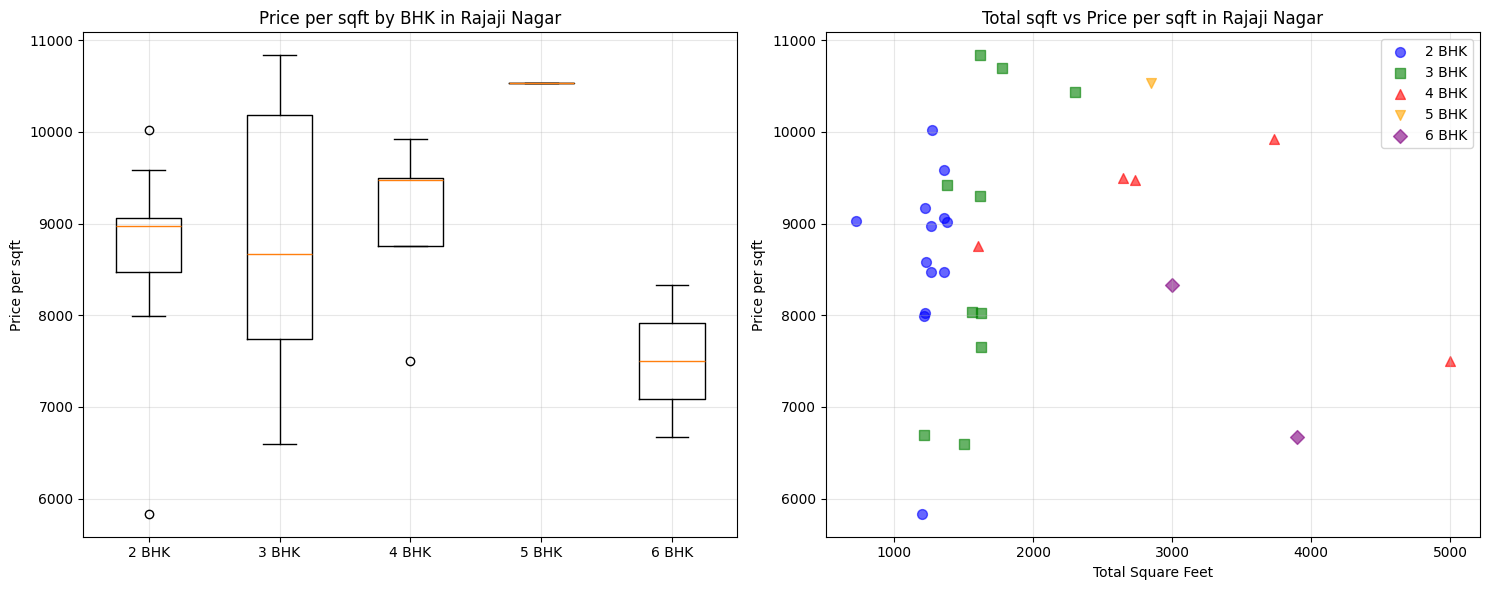


BHK PRICE ANALYSIS FOR: Rajaji Nagar
⚠️ ANOMALY: 2 BHK (₹8849/sqft) > 3 BHK (₹6694/sqft) in same sqft range
⚠️ ANOMALY: 3 BHK (₹9490/sqft) > 4 BHK (₹8750/sqft) in same sqft range
- No overlap in sqft range between 4 and 5 BHK
- No overlap in sqft range between 5 and 6 BHK

Summary for Rajaji Nagar:
Total properties: 31
BHK distribution: {2: 13, 3: 10, 4: 5, 6: 2, 5: 1}


C:\Users\krish\AppData\Local\Temp\ipykernel_3488\1986771085.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(bp_data, labels=[f'{bhk} BHK' for bhk in bhk_values])


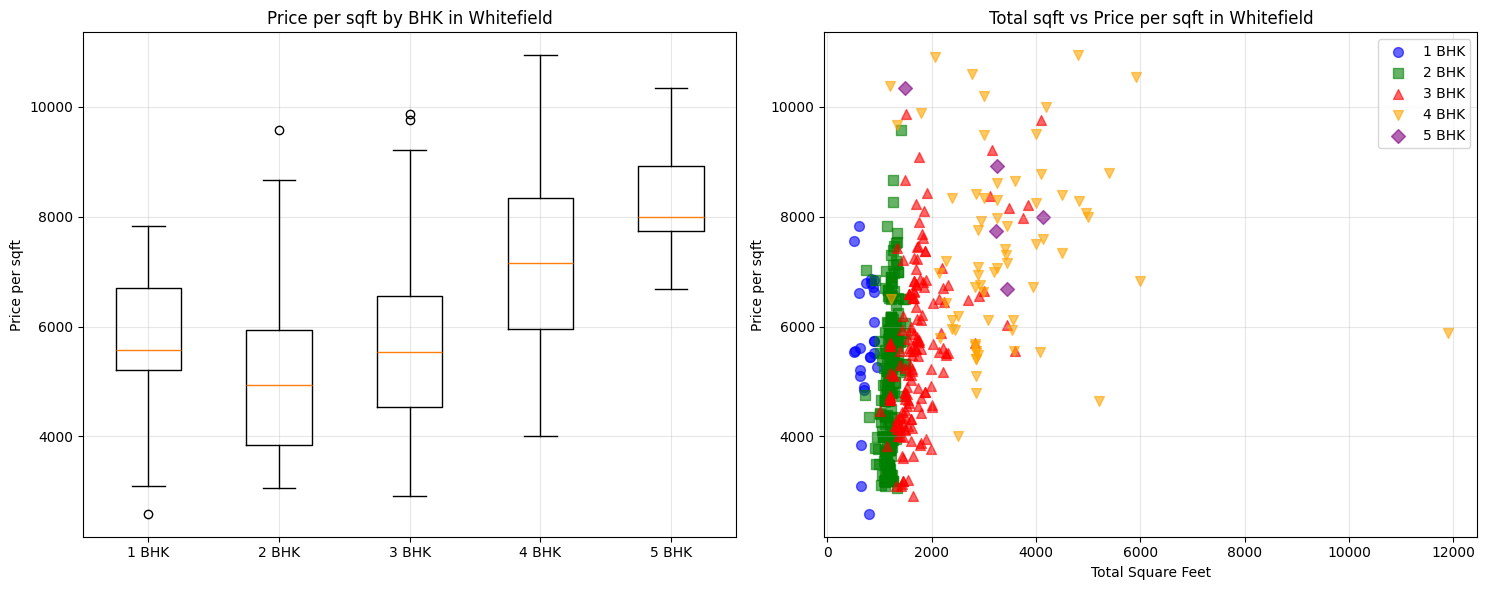


BHK PRICE ANALYSIS FOR: Whitefield
⚠️ ANOMALY: 1 BHK (₹5893/sqft) > 2 BHK (₹5045/sqft) in same sqft range
⚠️ ANOMALY: 2 BHK (₹5032/sqft) > 3 BHK (₹4600/sqft) in same sqft range
✓ Normal: 3 BHK (₹5639/sqft) ≤ 4 BHK (₹7169/sqft)
✓ Normal: 4 BHK (₹7113/sqft) ≤ 5 BHK (₹8336/sqft)

Summary for Whitefield:
Total properties: 498
BHK distribution: {2: 233, 3: 165, 4: 69, 1: 26, 5: 5}


C:\Users\krish\AppData\Local\Temp\ipykernel_3488\1986771085.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(bp_data, labels=[f'{bhk} BHK' for bhk in bhk_values])


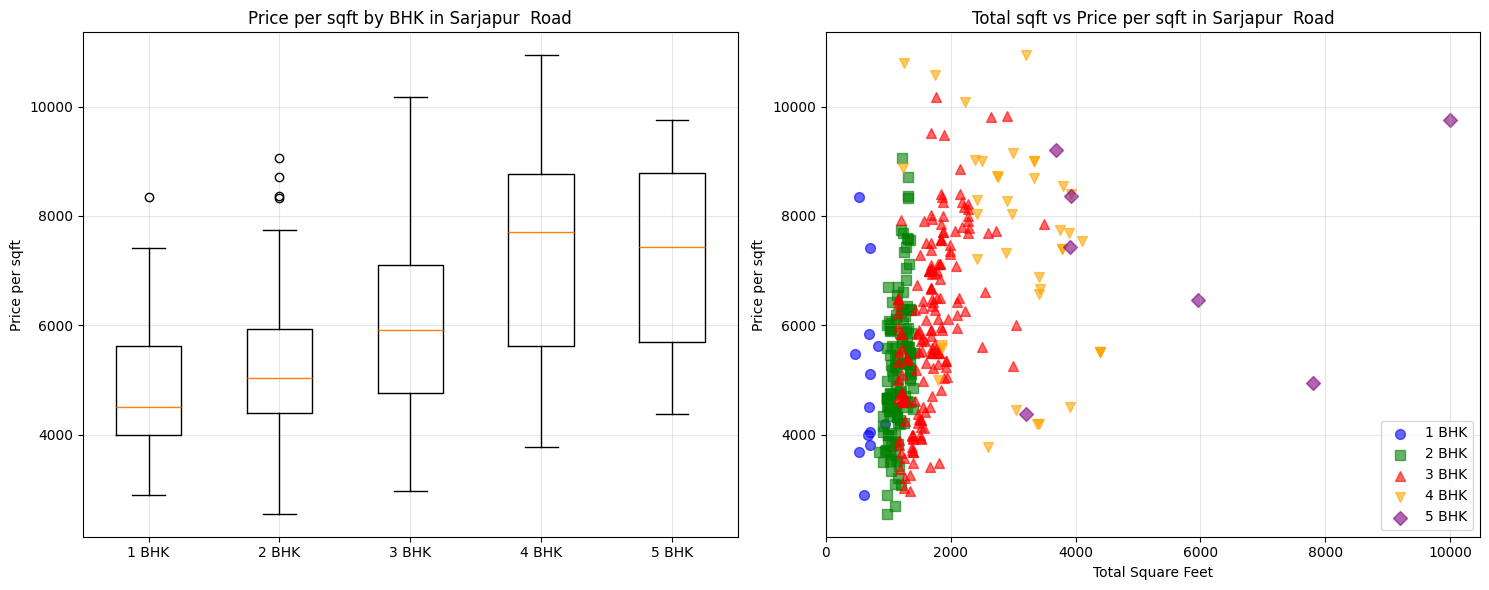


BHK PRICE ANALYSIS FOR: Sarjapur  Road
⚠️ ANOMALY: 1 BHK (₹4200/sqft) > 2 BHK (₹3905/sqft) in same sqft range
⚠️ ANOMALY: 2 BHK (₹5869/sqft) > 3 BHK (₹4664/sqft) in same sqft range
✓ Normal: 3 BHK (₹6129/sqft) ≤ 4 BHK (₹7678/sqft)
✓ Normal: 4 BHK (₹7092/sqft) ≤ 5 BHK (₹7345/sqft)

Summary for Sarjapur  Road:
Total properties: 373
BHK distribution: {3: 174, 2: 139, 4: 40, 1: 13, 5: 7}


In [50]:
#plots before removing outliers
check_bhk_price_anomalies(df6, 'Rajaji Nagar')
check_bhk_price_anomalies(df6, 'Whitefield')
check_bhk_price_anomalies(df6, 'Sarjapur  Road')

In [51]:
#the above function
#Detects illogical pricing where smaller apartments (lower BHK) cost more per sqft than larger ones in the same area
#Compares within overlapping size ranges to ensure fair comparison of similar-sized properties
#Identifies data anomalies that could skew ML models if not cleaned

#the above plots
#Left plot (boxplot) shows price distribution for each BHK type - reveals median prices and outliers
#Right plot (scatter) visualizes size vs price relationship - helps spot overlapping ranges where anomalies occur
def remove_bhk_anomalies(df):
    """
    Remove properties where smaller BHK costs more than larger BHK
    in the same location and overlapping size range.
    """
    df_clean = df.copy()
    anomalies_to_remove = []
    
    for location in df['location'].unique():
        location_data = df[df['location'] == location]
        bhk_values = sorted(location_data['BHK'].unique())
        
        # Compare each BHK with the next larger one
        for i in range(len(bhk_values) - 1):
            bhk_small = bhk_values[i]
            bhk_large = bhk_values[i + 1]
            
            small_data = location_data[location_data['BHK'] == bhk_small]
            large_data = location_data[location_data['BHK'] == bhk_large]
            
            if len(small_data) > 0 and len(large_data) > 0:
                # Find overlapping sqft range
                min_sqft = max(small_data['total_sqft'].min(), large_data['total_sqft'].min())
                max_sqft = min(small_data['total_sqft'].max(), large_data['total_sqft'].max())
                
                if min_sqft < max_sqft:  # There is overlap
                    # Get properties in overlapping range
                    small_overlap = small_data[(small_data['total_sqft'] >= min_sqft) & 
                                              (small_data['total_sqft'] <= max_sqft)]
                    large_overlap = large_data[(large_data['total_sqft'] >= min_sqft) & 
                                              (large_data['total_sqft'] <= max_sqft)]
                    
                    if len(small_overlap) > 0 and len(large_overlap) > 0:
                        # Calculate price thresholds
                        large_median = large_overlap['price_per_sqft'].median()
                        
                        # Find small BHK properties priced higher than large BHK median
                        anomalies = small_overlap[small_overlap['price_per_sqft'] > large_median]
                        anomalies_to_remove.extend(anomalies.index.tolist())
    
    # Remove all detected anomalies
    df_clean = df_clean.drop(anomalies_to_remove)
    print(f"Removed {len(anomalies_to_remove)} BHK price anomaly outliers")
    return df_clean


In [52]:
df7 = remove_bhk_anomalies(df6)
df7.head(20)
#this function;
#Compares consecutive BHK sizes (1vs2, 2vs3, etc.) within each location to detect illogical pricing
#Only analyzes overlapping size ranges where smaller and larger BHK apartments have similar total square footage
#Removes smaller BHK properties that are priced higher than the median price of larger BHK apartments in the same size range

Removed 1905 BHK price anomaly outliers


,location,size,total_sqft,bath,price,BHK,price_per_sqft
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.00,2,3800.000000
13,Gottigere,2 BHK,1100.0,2.0,40.00,2,3636.363636


In [53]:
df7.shape

(9468, 7)

C:\Users\krish\AppData\Local\Temp\ipykernel_3488\1986771085.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(bp_data, labels=[f'{bhk} BHK' for bhk in bhk_values])


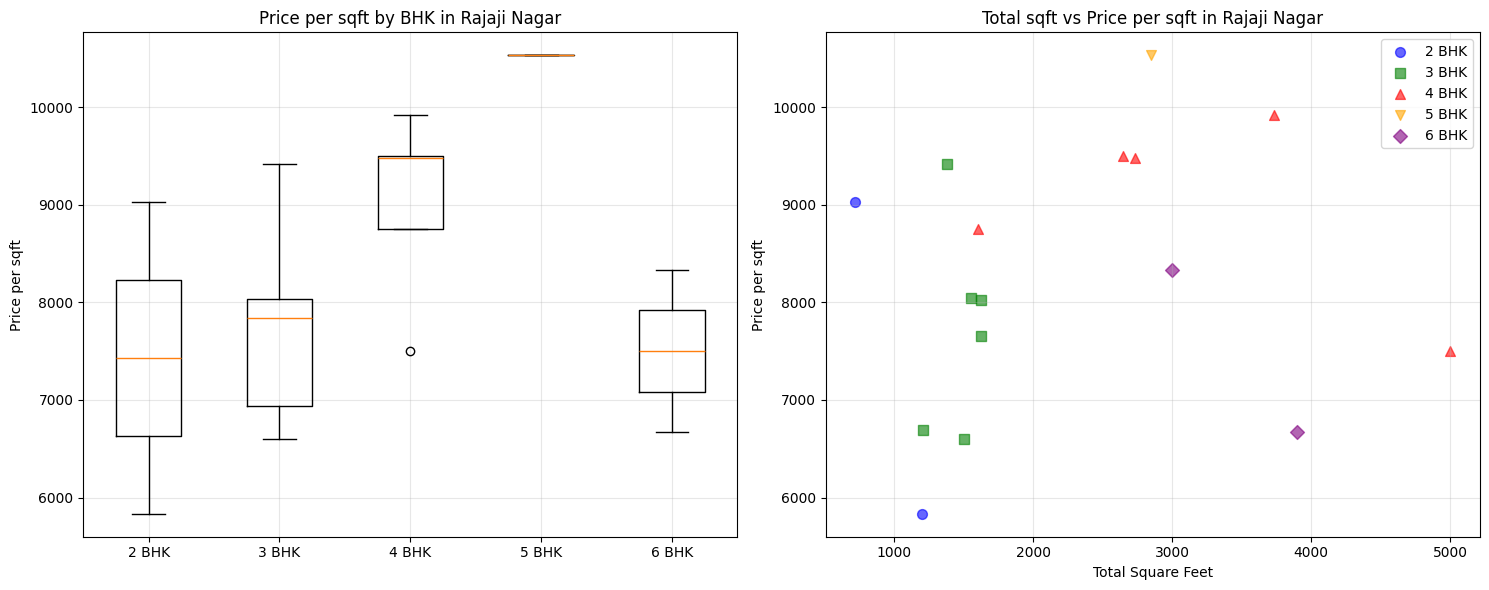


BHK PRICE ANALYSIS FOR: Rajaji Nagar
- No overlap in sqft range between 2 and 3 BHK
✓ Normal: 3 BHK (₹7835/sqft) ≤ 4 BHK (₹8750/sqft)
- No overlap in sqft range between 4 and 5 BHK
- No overlap in sqft range between 5 and 6 BHK

Summary for Rajaji Nagar:
Total properties: 16
BHK distribution: {3: 6, 4: 5, 2: 2, 6: 2, 5: 1}


C:\Users\krish\AppData\Local\Temp\ipykernel_3488\1986771085.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(bp_data, labels=[f'{bhk} BHK' for bhk in bhk_values])


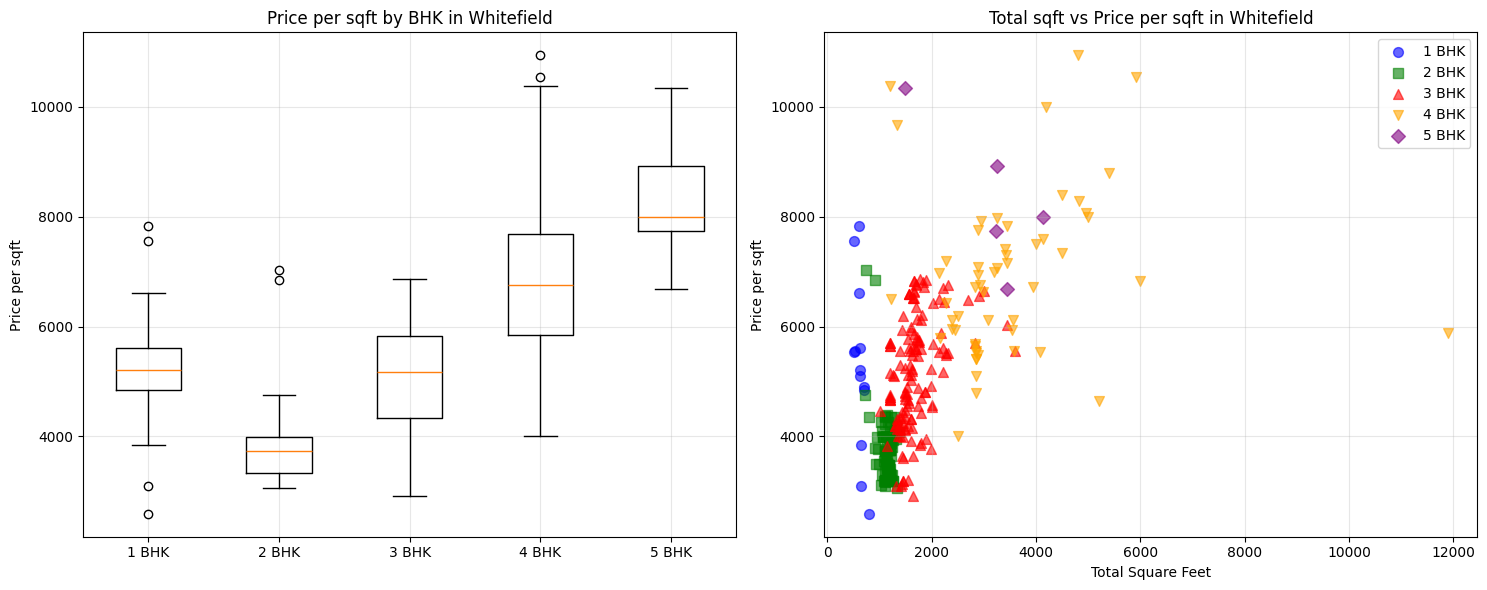


BHK PRICE ANALYSIS FOR: Whitefield
✓ Normal: 1 BHK (₹2593/sqft) ≤ 2 BHK (₹5379/sqft)
✓ Normal: 2 BHK (₹3652/sqft) ≤ 3 BHK (₹4670/sqft)
✓ Normal: 3 BHK (₹5173/sqft) ≤ 4 BHK (₹6539/sqft)
✓ Normal: 4 BHK (₹6396/sqft) ≤ 5 BHK (₹8336/sqft)

Summary for Whitefield:
Total properties: 303
BHK distribution: {3: 140, 2: 90, 4: 55, 1: 13, 5: 5}


C:\Users\krish\AppData\Local\Temp\ipykernel_3488\1986771085.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(bp_data, labels=[f'{bhk} BHK' for bhk in bhk_values])


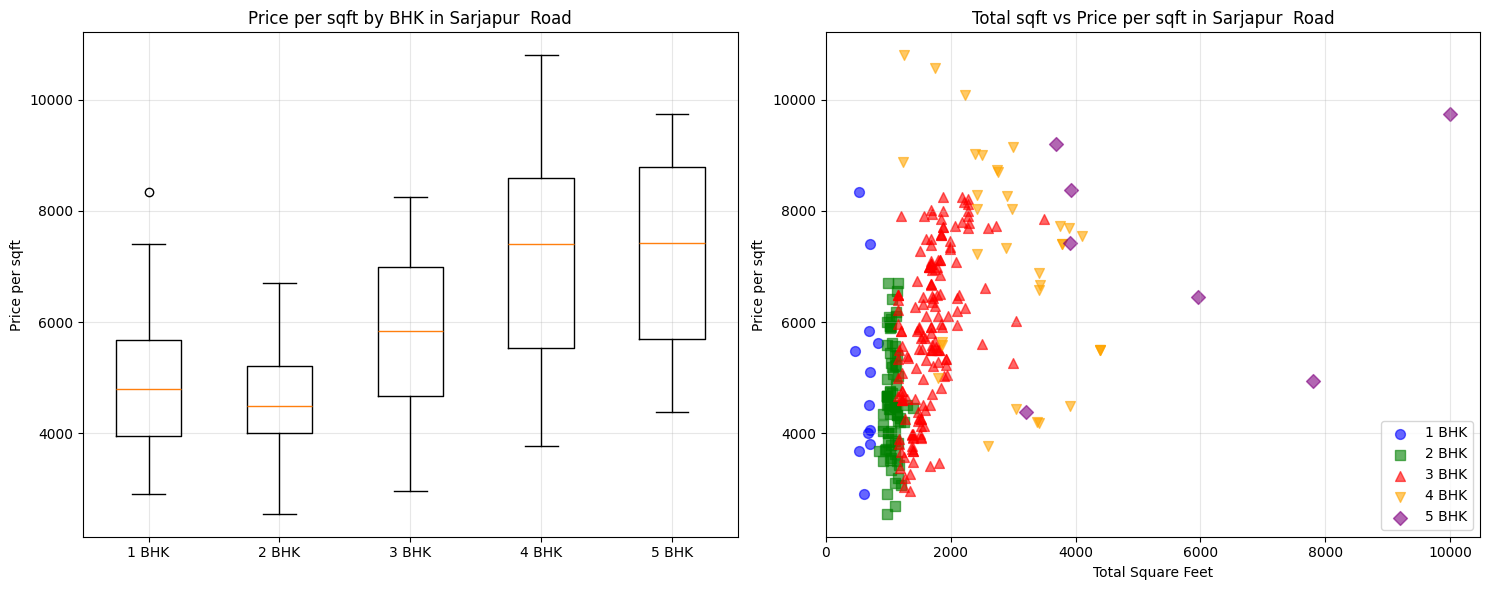


BHK PRICE ANALYSIS FOR: Sarjapur  Road
- No overlap in sqft range between 1 and 2 BHK
✓ Normal: 2 BHK (₹4020/sqft) ≤ 3 BHK (₹4804/sqft)
✓ Normal: 3 BHK (₹5932/sqft) ≤ 4 BHK (₹7401/sqft)
✓ Normal: 4 BHK (₹6234/sqft) ≤ 5 BHK (₹7345/sqft)

Summary for Sarjapur  Road:
Total properties: 303
BHK distribution: {3: 165, 2: 85, 4: 34, 1: 12, 5: 7}


In [54]:
#plots after removing outliers
check_bhk_price_anomalies(df7, 'Rajaji Nagar')
check_bhk_price_anomalies(df7, 'Whitefield')
check_bhk_price_anomalies(df7, 'Sarjapur  Road')

Text(0, 0.5, 'count')

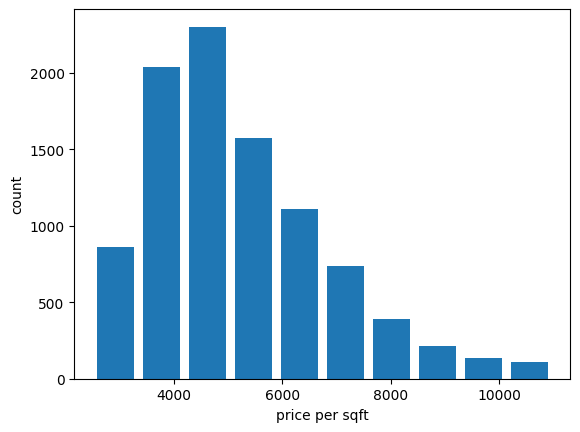

In [55]:
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")  
plt.ylabel('count')

In [56]:
df7['bath'].unique()

array([5., 2., 3., 4., 1., 8., 6., 7., 9.])

In [57]:
df7[df7.bath>8]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
2031,other,7 Bedroom,4400.0,9.0,120.0,7,2727.272727
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
11070,Thanisandra,8 Bedroom,3600.0,9.0,125.0,8,3472.222222


Text(0, 0.5, 'count')

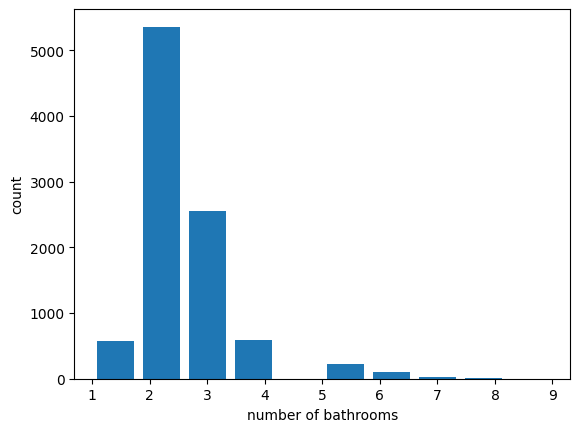

In [58]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")  
plt.ylabel('count')


In [59]:
#lets say manager says if no. of bathrooms>bhk+2 , mark as outliers
df7[df7['bath']>df7['BHK']+2]
#all these are outliers


,location,size,total_sqft,bath,price,BHK,price_per_sqft
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [60]:
df7 = df7[df7['bath']<df7['BHK']+2]
df7.shape

(9391, 7)

In [61]:
#now we can take the imp features only to start the model traning
#feature extraction
#drop coloums we dont need
df8 = df7.drop(['size','price_per_sqft'],axis='columns')

In [62]:
print(df8.shape)
df8.head(10)

(9391, 5)


,location,total_sqft,bath,price,BHK
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
8,Marathahalli,1310.0,3.0,63.25,3
10,Whitefield,1800.0,2.0,70.00,3
12,7th Phase JP Nagar,1000.0,2.0,38.00,2
13,Gottigere,1100.0,2.0,40.00,2


In [63]:
#now we can make dummy variables for the location feature
#as its a categorical feature
# This gives True/False (boolean)
dummies_bool = pd.get_dummies(df8.location)
print(dummies_bool.dtypes)  # Shows bool

# This gives 1/0 (integer)
dummies = pd.get_dummies(df8.location, dtype=int)
print(dummies.dtypes) 
# Shows int64

1st Block Jayanagar          bool
1st Phase JP Nagar           bool
2nd Phase Judicial Layout    bool
2nd Stage Nagarbhavi         bool
5th Block Hbr Layout         bool
                             ... 
Yelahanka                    bool
Yelahanka New Town           bool
Yelenahalli                  bool
Yeshwanthpur                 bool
other                        bool
Length: 241, dtype: object
1st Block Jayanagar          int64
1st Phase JP Nagar           int64
2nd Phase Judicial Layout    int64
2nd Stage Nagarbhavi         int64
5th Block Hbr Layout         int64
                             ...  
Yelahanka                    int64
Yelahanka New Town           int64
Yelenahalli                  int64
Yeshwanthpur                 int64
other                        int64
Length: 241, dtype: object


In [64]:
df9 = pd.concat([df8,dummies],axis='columns')
#to avoid dummy vairable slaq , we can drop one coloumn
df9 = df9.drop("other",axis='columns')
df9.shape

(9391, 245)

In [65]:
df9.head(10)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,1170.0,2.0,38.00,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,Old Airport Road,2732.0,4.0,204.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Marathahalli,1310.0,3.0,63.25,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Whitefield,1800.0,2.0,70.00,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12,7th Phase JP Nagar,1000.0,2.0,38.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,Gottigere,1100.0,2.0,40.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df10 = df9.drop('location',axis='columns')
df10.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2600.0,5.0,120.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,38.0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
X = df10.drop('price',axis='columns')
#this is the independent vairables

In [68]:
y = df10['price']
#these are the acctual values


In [69]:
# its always a good pratice to train test split the dataset 
#this ensures that we dont overfit the model and that we can always have data to test its accuracy 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [70]:
#lets start by using linear regression technique
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [71]:
model.score(X_test,y_test)

0.8809280635569259

In [72]:
# K-fold cross validation to check the performance of the model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.5,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.83920231, 0.80444487, 0.83097962, 0.8072824 , 0.81057072])

In [73]:
# now we will try diffrent regression techniques 
# using grid search cv to get the best parameters and algorithm (hyperparameter tuning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

def find_best_model(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0],
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1.0, 10.0],
                'fit_intercept': [True, False]
            }
        }
        
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [74]:
find_best_model(X, y)

,model,best_score,best_params
0,linear_regression,0.814008,"{'fit_intercept': True, 'positive': False}"
1,ridge,0.814612,"{'alpha': 1.0, 'fit_intercept': True}"
2,lasso,0.779710,"{'alpha': 0.1, 'fit_intercept': True}"


In [107]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index]=1
    return 2*model.predict([x])[0]

In [94]:
df9['location'].value_counts()

location
other                   1504
Whitefield               301
Sarjapur  Road           295
Kanakpura Road           212
Thanisandra              198
                        ... 
Sarakki Nagar              4
1st Block Jayanagar        3
Giri Nagar                 2
2nd Stage Nagarbhavi       2
HAL 2nd Stage              1
Name: count, Length: 241, dtype: int64

In [105]:
df9[df['location']=='Indira Nagar'].head()

C:\Users\krish\AppData\Local\Temp\ipykernel_3488\4249695960.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df9[df['location']=='Indira Nagar'].head()


,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
663,Indira Nagar,2200.0,4.0,200.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,Indira Nagar,1200.0,2.0,93.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128,Indira Nagar,1128.0,2.0,105.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3249,Indira Nagar,1875.0,3.0,180.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3260,Indira Nagar,1210.0,2.0,102.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
predict_price('1st Phase JP Nagar',1000,2,2)

c:\Users\krish\house-price-pred\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(169.83633262397075)

In [86]:
predict_price('1st Phase JP Nagar',1000,2,3)

c:\Users\krish\house-price-pred\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(163.24074737065632)

In [102]:
predict_price('Indira Nagar',1000,3,3)

c:\Users\krish\house-price-pred\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(206.54382607798863)

In [110]:
predict_price('Sarjapur  Road',1300,2,3)

c:\Users\krish\house-price-pred\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(143.98035056047496)

In [108]:
import pickle
with open('../model/banglore_home_price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [109]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("../model/columns.json",'w') as f:
    f.write(json.dumps(columns))